In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings as warnings
warnings.filterwarnings('ignore')

In [2]:
crashes = pd.read_csv('/kaggle/input/chicago-datasets/Traffic_Crashes_-_Crashes.csv')

In [3]:
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [4]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880397 entries, 0 to 880396
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                880397 non-null  object 
 1   CRASH_DATE_EST_I               65239 non-null   object 
 2   CRASH_DATE                     880397 non-null  object 
 3   POSTED_SPEED_LIMIT             880397 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         880397 non-null  object 
 5   DEVICE_CONDITION               880397 non-null  object 
 6   WEATHER_CONDITION              880397 non-null  object 
 7   LIGHTING_CONDITION             880397 non-null  object 
 8   FIRST_CRASH_TYPE               880397 non-null  object 
 9   TRAFFICWAY_TYPE                880397 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      880397 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [5]:
crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,880397.000000,1.990170e+05,880397.000000,880392.000000,880397.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.0,880397.000000,880397.000000,880397.000000,874124.000000,874124.000000
mean,28.417869,1.332970e+01,3687.516283,1244.795019,2.035156,0.193559,0.001190,0.019827,0.108623,0.063920,2.001335,0.0,13.204423,4.121889,6.642730,41.855120,-87.673682
std,6.121812,2.961542e+03,2880.737882,705.003878,0.452478,0.571516,0.037385,0.164965,0.425052,0.325037,1.157204,0.0,5.573031,1.981378,3.363494,0.334126,0.678805
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1250.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783061,-87.721824
50%,30.000000,2.000000e+00,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874952,-87.674228
75%,30.000000,4.000000e+00,5563.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924519,-87.633513
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [6]:
#check for duplicates
crashes.duplicated().values.any()

False

In [7]:
columns_to_drop = ['CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I',
                   'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'LATITUDE', 'LONGITUDE', 'LOCATION']

In [8]:
crashes.drop(columns=columns_to_drop, inplace=True)

In [9]:
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,3.0,0.0,1.0,2.0,0.0,2.0,0.0,19,3,9
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,9
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8


In [10]:
crashes.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       27042
CRASH_TYPE                            0
HIT_AND_RUN_I                    604340
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4
STREET_NAME                           1
BEAT_OF_OCCURRENCE                    5
NUM_UNITS                             0
MOST_SEVERE_INJURY                 1956


In [11]:
crashes['REPORT_TYPE'].value_counts()

REPORT_TYPE
NOT ON SCENE (DESK REPORT)    480023
ON SCENE                      373092
AMENDED                          240
Name: count, dtype: int64

In [12]:
rows_to_remove = crashes[crashes['INJURIES_TOTAL'].isnull()].index

In [13]:
crashes.drop(rows_to_remove, inplace=True)

In [14]:
crashes.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       26992
CRASH_TYPE                            0
HIT_AND_RUN_I                    603201
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4
STREET_NAME                           1
BEAT_OF_OCCURRENCE                    5
NUM_UNITS                             0
MOST_SEVERE_INJURY                   14


In [15]:
crashes['STREET_DIRECTION'].value_counts()

STREET_DIRECTION
W    314446
S    293477
N    211079
E     59449
Name: count, dtype: int64

In [16]:
crashes['STREET_NAME'].value_counts()

STREET_NAME
WESTERN AVE        24007
PULASKI RD         21221
CICERO AVE         19743
ASHLAND AVE        19095
HALSTED ST         17013
                   ...  
MCCORMICK BLVD.        1
POST 16 ST             1
RWY 22L                1
FRANKLIN SD            1
SCIENCE DR             1
Name: count, Length: 1645, dtype: int64

In [17]:
crashes['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     755170
NONINCAPACITATING INJURY     69320
REPORTED, NOT EVIDENT        38189
INCAPACITATING INJURY        14798
FATAL                          964
Name: count, dtype: int64

In [18]:
crashes['BEAT_OF_OCCURRENCE'].value_counts()

BEAT_OF_OCCURRENCE
1834.0    10674
114.0      9091
813.0      8872
815.0      8378
1831.0     8038
          ...  
1653.0      479
1655.0      294
1652.0      229
1650.0       68
6100.0        7
Name: count, Length: 276, dtype: int64

In [19]:
crashes['HIT_AND_RUN_I'].value_counts()

HIT_AND_RUN_I
Y    263547
N     11707
Name: count, dtype: int64

In [20]:
#filling null values  with most frequent values.
mf_street_direction = crashes['STREET_DIRECTION'].mode()[0]
mf_most_severe_injury = crashes['MOST_SEVERE_INJURY'].mode()[0] 
mf_street_name = crashes['STREET_NAME'].mode()[0]

crashes['STREET_DIRECTION'].fillna(mf_street_direction, inplace=True)
crashes['MOST_SEVERE_INJURY'].fillna(mf_most_severe_injury, inplace=True)
crashes['STREET_NAME'].fillna(mf_street_name, inplace=True)

In [21]:
crashes.drop(columns=['REPORT_TYPE', 'BEAT_OF_OCCURRENCE', 'HIT_AND_RUN_I'], inplace=True)

In [22]:
crashes.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN    

In [23]:
vehicles = pd.read_csv('/kaggle/input/chicago-datasets/Traffic_Crashes_-_Vehicles.csv')

In [24]:
vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1727162,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,12/21/2023 08:57:00 AM,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795922 entries, 0 to 1795921
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

In [26]:
vehicles.duplicated().values.any()

False

In [27]:
vehicles.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

In [28]:
columns_to_drop = ['AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I',
                   'AREA_08_I', 'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I']

In [29]:
vehicles.drop(columns=columns_to_drop, inplace=True)

In [30]:
vehicles.isnull().sum()

CRASH_UNIT_ID                     0
CRASH_RECORD_ID                   0
CRASH_DATE                        0
UNIT_NO                           0
UNIT_TYPE                      2224
NUM_PASSENGERS              1529938
VEHICLE_ID                    41840
CMRC_VEH_I                  1762524
MAKE                          41845
MODEL                         41990
LIC_PLATE_STATE              202424
VEHICLE_YEAR                 321275
VEHICLE_DEFECT                41840
VEHICLE_TYPE                  41840
VEHICLE_USE                   41840
TRAVEL_DIRECTION              41840
MANEUVER                      41840
TOWED_I                     1573081
FIRE_I                      1794455
OCCUPANT_CNT                  41840
EXCEED_SPEED_LIMIT_I        1793520
TOWED_BY                    1627522
TOWED_TO                    1692581
FIRST_CONTACT_POINT           44983
CMV_ID                      1777777
USDOT_NO                    1785808
CCMC_NO                     1793800
ILCC_NO                     

In [31]:
vehicles.drop(columns=['CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO','COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',      'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO','MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I','TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
       'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG','CARGO_BODY_TYPE', 'LOAD_TYPE', 
       'HAZMAT_OUT_OF_SERVICE_I','MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS','EXCEED_SPEED_LIMIT_I', 'TOWED_BY','TOWED_TO',
       'TOWED_I', 'FIRE_I','CMRC_VEH_I','NUM_PASSENGERS'], inplace=True)

In [32]:
vehicles.isnull().sum()

CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                2224
VEHICLE_ID              41840
MAKE                    41845
MODEL                   41990
LIC_PLATE_STATE        202424
VEHICLE_YEAR           321275
VEHICLE_DEFECT          41840
VEHICLE_TYPE            41840
VEHICLE_USE             41840
TRAVEL_DIRECTION        41840
MANEUVER                41840
OCCUPANT_CNT            41840
FIRST_CONTACT_POINT     44983
dtype: int64

In [33]:
vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
0,1727162,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,12/21/2023 08:57:00 AM,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,1634931.0,NISSAN,SENTRA,IL,2009.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT
2,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,1634978.0,CHRYSLER,SEBRING,IL,2010.0,NONE,PASSENGER,PERSONAL,S,PASSING/OVERTAKING,1.0,REAR-RIGHT-CORNER
3,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,1634948.0,SUBARU,OUTBACK,IL,2015.0,UNKNOWN,PASSENGER,PERSONAL,W,TURNING RIGHT,1.0,FRONT
4,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,1637401.0,TOYOTA,RAV4,IL,2018.0,UNKNOWN,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,SIDE-LEFT-FRONT


In [34]:
vehicles['UNIT_TYPE'].value_counts()

UNIT_TYPE
DRIVER                 1503299
PARKED                  236817
PEDESTRIAN               22716
DRIVERLESS               14359
BICYCLE                  14280
NON-MOTOR VEHICLE         1621
NON-CONTACT VEHICLE        325
DISABLED VEHICLE           274
EQUESTRIAN                   7
Name: count, dtype: int64

In [35]:
vehicles['MAKE'].value_counts()

MAKE
CHEVROLET                                    202560
FORD                                         175220
UNKNOWN                                      174599
NISSAN                                       141483
HONDA                                        129283
                                              ...  
NEW IDEA ELECTRIC LAWN GARDEN TRACTOR             1
REX                                               1
TRAIL MASTER TRAILERS, INC., COLEMAN, OK          1
TRANSPORT SYSTEMS, INC., DENTON, TEXAS            1
CORN BELT MANUFACTURING, INC. (EARLY, IA)         1
Name: count, Length: 1381, dtype: int64

In [36]:
vehicles['MODEL'].value_counts()

MODEL
UNKNOWN                         180803
OTHER (EXPLAIN IN NARRATIVE)    167239
CAMRY                            55862
COROLLA                          35368
CIVIC                            33651
                                 ...  
BRAT                                 1
DUKE MOBILE HOMES                    1
FERGUSON MFG. CO., INC.              1
WAYSIDE CAMPERS                      1
CENTURY ENGINEERING CORP.            1
Name: count, Length: 2771, dtype: int64

In [37]:
vehicles['LIC_PLATE_STATE'].value_counts()

LIC_PLATE_STATE
IL    1460128
IN      32220
XX      30652
WI      10264
MI       6897
FL       6639
TX       5094
OH       4206
AZ       3709
MN       3021
IA       2866
CA       2710
MO       2696
TN       2453
GA       2078
OK       1472
PA       1277
NY       1241
KY       1055
VA       1041
NC        988
NJ        970
CO        863
MS        805
MD        726
AL        695
NB        652
WA        626
KS        609
MA        542
LA        537
AR        515
SC        408
ME        378
NV        290
OR        288
CT        260
UT        232
MT        189
SD        181
ID        164
NM        159
ND        132
WV        105
NH         83
RI         75
DE         74
DC         66
VT         60
AK         46
WY         39
HI         22
Name: count, dtype: int64

In [38]:
vehicles['VEHICLE_YEAR'].value_counts()

VEHICLE_YEAR
2015.0    108201
2016.0    101971
2017.0    101756
2014.0     95887
2013.0     88641
           ...  
2218.0         1
1939.0         1
6628.0         1
2046.0         1
2320.0         1
Name: count, Length: 242, dtype: int64

In [39]:
vehicles['FIRST_CONTACT_POINT'].value_counts()


FIRST_CONTACT_POINT
FRONT                 344058
REAR                  231752
UNKNOWN               167342
SIDE-LEFT             120702
FRONT-LEFT-CORNER     115778
SIDE-RIGHT            114848
FRONT-RIGHT-CORNER    113423
FRONT-LEFT             81524
FRONT-RIGHT            76903
REAR-LEFT              68088
REAR-LEFT-CORNER       51510
OTHER                  41620
REAR-RIGHT-CORNER      37659
REAR-RIGHT             36488
SIDE-LEFT-REAR         29425
TOTAL (ALL AREAS)      28019
SIDE-RIGHT-REAR        22277
SIDE-LEFT-FRONT        19175
SIDE-RIGHT-FRONT       16556
NONE                   13799
ROOF                   11958
UNDER CARRIAGE          5844
TOP                     2191
Name: count, dtype: int64

In [40]:
rows_to_remove = vehicles[vehicles['VEHICLE_DEFECT'].isnull()].index

In [41]:
vehicles.drop(rows_to_remove, inplace=True)

In [42]:
vehicles.drop(columns=['LIC_PLATE_STATE', 'VEHICLE_YEAR'], inplace=True)

In [43]:
mf_unit_type = vehicles['UNIT_TYPE'].mode()[0]

vehicles['UNIT_TYPE'].fillna(mf_unit_type, inplace=True)
vehicles['MAKE'].fillna('UNKNOWN', inplace=True)
vehicles['MODEL'].fillna('UNKNOWN', inplace=True)
vehicles['FIRST_CONTACT_POINT'].fillna('UNKNOWN', inplace=True)

In [44]:
vehicles.isnull().sum()

CRASH_UNIT_ID          0
CRASH_RECORD_ID        0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
FIRST_CONTACT_POINT    0
dtype: int64

In [45]:
people = pd.read_csv('/kaggle/input/chicago-datasets/Traffic_Crashes_-_People.csv')

In [46]:
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [47]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933523 entries, 0 to 1933522
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [48]:
people.duplicated().values.any()

False

In [49]:
people.shape

(1933523, 29)

In [50]:
people.isnull().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID                 39465
CRASH_DATE                     0
SEAT_NO                  1542241
CITY                      526764
STATE                     505394
ZIPCODE                   640085
SEX                        32541
AGE                       563607
DRIVERS_LICENSE_STATE     801876
DRIVERS_LICENSE_CLASS     991512
SAFETY_EQUIPMENT            5378
AIRBAG_DEPLOYED            37965
EJECTION                   24133
INJURY_CLASSIFICATION        743
HOSPITAL                 1618492
EMS_AGENCY               1738911
EMS_RUN_NO               1901036
DRIVER_ACTION             394748
DRIVER_VISION             395340
PHYSICAL_CONDITION        393693
PEDPEDAL_ACTION          1895845
PEDPEDAL_VISIBILITY      1895913
PEDPEDAL_LOCATION        1895845
BAC_RESULT                393802
BAC_RESULT VALUE         1931407
CELL_PHONE_USE           1932363
dtype: int64

In [51]:
people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [52]:
columns_to_drop = ['SEAT_NO', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO','PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']

In [53]:
people.drop(columns=columns_to_drop, inplace=True)

In [54]:
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED


In [55]:
people.isnull().sum()

PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                39465
CRASH_DATE                    0
CITY                     526764
STATE                    505394
ZIPCODE                  640085
SEX                       32541
AGE                      563607
DRIVERS_LICENSE_STATE    801876
DRIVERS_LICENSE_CLASS    991512
SAFETY_EQUIPMENT           5378
AIRBAG_DEPLOYED           37965
EJECTION                  24133
INJURY_CLASSIFICATION       743
DRIVER_ACTION            394748
DRIVER_VISION            395340
PHYSICAL_CONDITION       393693
BAC_RESULT               393802
dtype: int64

In [56]:
people['SEX'].value_counts()

SEX
M    999438
F    725948
X    175596
Name: count, dtype: int64

In [57]:
people['AGE'].value_counts()

AGE
 26.0     38330
 25.0     38325
 27.0     38300
 28.0     37713
 24.0     37143
          ...  
-47.0         1
-49.0         1
-177.0        1
-40.0         1
-59.0         1
Name: count, Length: 117, dtype: int64

In [58]:
people['DRIVERS_LICENSE_STATE'].value_counts()

DRIVERS_LICENSE_STATE
IL    1035411
XX      25688
IN      19273
WI       6339
MI       4827
       ...   
NN          1
TT          1
KN          1
IR          1
EY          1
Name: count, Length: 212, dtype: int64

In [59]:
people['DRIVERS_LICENSE_CLASS'].value_counts()

DRIVERS_LICENSE_CLASS
D     819699
A      33917
B      25860
C      25728
DM     13965
       ...  
CF         1
12         1
B+         1
1G         1
25         1
Name: count, Length: 289, dtype: int64

In [60]:
people['SAFETY_EQUIPMENT'].value_counts()

SAFETY_EQUIPMENT
USAGE UNKNOWN                                 915385
SAFETY BELT USED                              899835
NONE PRESENT                                   65194
SAFETY BELT NOT USED                           10525
HELMET NOT USED                                 9721
CHILD RESTRAINT USED                            7822
CHILD RESTRAINT - FORWARD FACING                4950
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      3814
CHILD RESTRAINT - TYPE UNKNOWN                  2601
CHILD RESTRAINT - REAR FACING                   2251
DOT COMPLIANT MOTORCYCLE HELMET                 1530
HELMET USED                                     1358
BOOSTER SEAT                                    1286
CHILD RESTRAINT NOT USED                         854
NOT DOT COMPLIANT MOTORCYCLE HELMET              299
SHOULD/LAP BELT USED IMPROPERLY                  270
WHEELCHAIR                                       237
CHILD RESTRAINT USED IMPROPERLY                  167
STRETCHER                    

In [61]:
people['AIRBAG_DEPLOYED'].value_counts()

AIRBAG_DEPLOYED
DID NOT DEPLOY                            970719
NOT APPLICABLE                            409073
DEPLOYMENT UNKNOWN                        387679
DEPLOYED, FRONT                            60306
DEPLOYED, COMBINATION                      49304
DEPLOYED, SIDE                             17527
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       950
Name: count, dtype: int64

In [62]:
people['EJECTION'].value_counts()

EJECTION
NONE                  1779455
UNKNOWN                121542
TOTALLY EJECTED          5796
PARTIALLY EJECTED        1428
TRAPPED/EXTRICATED       1169
Name: count, dtype: int64

In [63]:
people['INJURY_CLASSIFICATION'].value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     1761927
NONINCAPACITATING INJURY      95855
REPORTED, NOT EVIDENT         56380
INCAPACITATING INJURY         17552
FATAL                          1066
Name: count, dtype: int64

In [64]:
people['DRIVER_ACTION'].value_counts()

DRIVER_ACTION
NONE                                 547933
UNKNOWN                              390730
FAILED TO YIELD                      139921
OTHER                                138385
FOLLOWED TOO CLOSELY                  90233
IMPROPER BACKING                      45321
IMPROPER TURN                         40487
IMPROPER LANE CHANGE                  39554
IMPROPER PASSING                      34526
DISREGARDED CONTROL DEVICES           27230
TOO FAST FOR CONDITIONS               22606
WRONG WAY/SIDE                         6211
IMPROPER PARKING                       5657
OVERCORRECTED                          3035
EVADING POLICE VEHICLE                 2411
CELL PHONE USE OTHER THAN TEXTING      2243
EMERGENCY VEHICLE ON CALL              1439
TEXTING                                 604
STOPPED SCHOOL BUS                      183
LICENSE RESTRICTIONS                     66
Name: count, dtype: int64

In [65]:
people['DRIVER_VISION'].value_counts()

DRIVER_VISION
NOT OBSCURED              769160
UNKNOWN                   732401
OTHER                      15108
MOVING VEHICLES             8639
PARKED VEHICLES             5309
WINDSHIELD (WATER/ICE)      4094
BLINDED - SUNLIGHT          1834
TREES, PLANTS                610
BUILDINGS                    540
BLINDED - HEADLIGHTS         164
BLOWING MATERIALS            105
HILLCREST                    100
EMBANKMENT                    83
SIGNBOARD                     36
Name: count, dtype: int64

In [66]:
people['PHYSICAL_CONDITION'].value_counts()

PHYSICAL_CONDITION
NORMAL                          997785
UNKNOWN                         513601
IMPAIRED - ALCOHOL                6484
REMOVED BY EMS                    5593
OTHER                             4483
EMOTIONAL                         4052
FATIGUED/ASLEEP                   4029
ILLNESS/FAINTED                   1382
HAD BEEN DRINKING                 1110
IMPAIRED - DRUGS                   720
IMPAIRED - ALCOHOL AND DRUGS       402
MEDICATED                          189
Name: count, dtype: int64

In [67]:
people['BAC_RESULT'].value_counts()

BAC_RESULT
TEST NOT OFFERED                   1517493
TEST REFUSED                         15857
TEST PERFORMED, RESULTS UNKNOWN       3662
TEST TAKEN                            2709
Name: count, dtype: int64

In [68]:
people.drop(columns=['VEHICLE_ID','CITY', 'STATE', 'ZIPCODE', 'AGE', 'DRIVERS_LICENSE_STATE','INJURY_CLASSIFICATION'], 
            inplace=True)

In [69]:
mf_dl_class = people['DRIVERS_LICENSE_CLASS'].mode()[0]
mf_bac_result = people['BAC_RESULT'].mode()[0]

people['DRIVERS_LICENSE_CLASS'].fillna(mf_dl_class, inplace=True)
people['BAC_RESULT'].fillna(mf_bac_result, inplace=True)
people['SEX'].fillna('X', inplace=True)
people['SAFETY_EQUIPMENT'].fillna('USAGE UNKNOWN', inplace=True)
people['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
people['EJECTION'].fillna('UNKNOWN', inplace=True)
people['DRIVER_ACTION'].fillna('UNKNOWN', inplace=True)
people['DRIVER_VISION'].fillna('UNKNOWN', inplace=True)
people['PHYSICAL_CONDITION'].fillna('UNKNOWN', inplace=True)

In [70]:
people.isnull().sum()

PERSON_ID                0
PERSON_TYPE              0
CRASH_RECORD_ID          0
CRASH_DATE               0
SEX                      0
DRIVERS_LICENSE_CLASS    0
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
EJECTION                 0
DRIVER_ACTION            0
DRIVER_VISION            0
PHYSICAL_CONDITION       0
BAC_RESULT               0
dtype: int64

In [71]:
#merging the datasets
df = pd.concat([crashes, vehicles, people], ignore_index=True)

In [72]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,PERSON_TYPE,SEX,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15.0,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.shape

(4566060, 56)

In [74]:
data =  df.copy()

column_info = []

for column in data.columns:
    unique_values = data[column].unique()
    num_unique_values = len(unique_values)
    data_type = data[column].dtype
    column_info.append([column, data_type, num_unique_values, unique_values])

column_table = pd.DataFrame(column_info, columns=['Column Name', 'Data Type', 'Number of Unique Values', 'Unique Values'])
column_table

,Column Name,Data Type,Number of Unique Values,Unique Values
0,CRASH_RECORD_ID,object,880397,[23a79931ef555d54118f64dc9be2cf2dbf59636ce253f...
1,CRASH_DATE,object,578550,"[09/05/2023 07:05:00 PM, 09/22/2023 06:45:00 P..."
2,POSTED_SPEED_LIMIT,float64,46,"[30.0, 50.0, 15.0, 25.0, 10.0, 35.0, 20.0, 55...."
3,TRAFFIC_CONTROL_DEVICE,object,20,"[TRAFFIC SIGNAL, NO CONTROLS, OTHER, UNKNOWN, ..."
4,DEVICE_CONDITION,object,9,"[FUNCTIONING PROPERLY, NO CONTROLS, FUNCTIONIN..."
5,WEATHER_CONDITION,object,13,"[CLEAR, SNOW, RAIN, UNKNOWN, CLOUDY/OVERCAST, ..."
6,LIGHTING_CONDITION,object,7,"[DUSK, DARKNESS, LIGHTED ROAD, DAYLIGHT, DARKN..."
7,FIRST_CRASH_TYPE,object,19,"[ANGLE, REAR END, PARKED MOTOR VEHICLE, SIDESW..."
8,TRAFFICWAY_TYPE,object,21,"[FIVE POINT, OR MORE, DIVIDED - W/MEDIAN BARRI..."
9,ALIGNMENT,object,7,"[STRAIGHT AND LEVEL, CURVE ON GRADE, CURVE, LE..."


In [75]:
df.describe()

,POSTED_SPEED_LIMIT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_UNIT_ID,UNIT_NO,VEHICLE_ID,OCCUPANT_CNT
count,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.0,878455.000000,878455.000000,878455.000000,1.754082e+06,1.754082e+06,1.754082e+06,1.754082e+06
mean,28.423662,3686.718992,2.035979,0.193559,0.001190,0.019827,0.108623,0.063920,2.001335,0.0,13.208981,4.122246,6.642409,9.595878e+05,3.711733e+00,9.133817e+05,1.079370e+00
std,6.115410,2880.237823,0.450958,0.571516,0.037385,0.164965,0.425052,0.325037,1.157204,0.0,5.567805,1.981014,3.363519,5.561452e+05,2.852600e+03,5.277574e+05,7.823897e-01
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
25%,30.000000,1250.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,4.771032e+05,1.000000e+00,4.566912e+05,1.000000e+00
50%,30.000000,3201.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,9.618725e+05,2.000000e+00,9.116525e+05,1.000000e+00
75%,30.000000,5560.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,1.441323e+06,2.000000e+00,1.369841e+06,1.000000e+00
max,99.000000,451100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,1.921950e+06,3.778035e+06,1.830999e+06,9.900000e+01


The primary contributory cause of a car accident is our target variable. As we are only interested in predicting causes of the crash, columns  not relevant to the model's predictions and should be removed.

In [76]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_UNIT_ID', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'OCCUPANT_CNT', 'FIRST_CONTACT_POINT', 'PERSON_ID', 'PERSON_TYPE',
       'SEX', 'DRIVERS_LICENSE_CLASS', '

In [77]:
columns_to_drop = ['CRASH_DATE','DATE_POLICE_NOTIFIED','STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'CRASH_UNIT_ID', 
                   'VEHICLE_ID', 'PERSON_ID']

In [78]:
df.drop(columns=columns_to_drop, inplace=True)

In [79]:
df.duplicated().values.any()

True

In [80]:
df = df.drop_duplicates(keep='first')

In [81]:
df.duplicated().values.any()

False

In [82]:
df.drop(columns=['CRASH_RECORD_ID'], inplace=True)

In [83]:
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,PERSON_TYPE,SEX,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 342907
FAILING TO YIELD RIGHT-OF-WAY                                                        97036
FOLLOWING TOO CLOSELY                                                                85019
NOT APPLICABLE                                                                       46319
IMPROPER OVERTAKING/PASSING                                                          43784
FAILING TO REDUCE SPEED TO AVOID CRASH                                               36950
IMPROPER BACKING                                                                     34164
IMPROPER LANE USAGE                                                                  31359
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  29787
IMPROPER TURNING/NO SIGNAL                                                           29425
DISREGARDING TRAFFIC SIGNALS                                      

In [85]:
#creating categories of the target variable since it has too many unique values
target_dict = {
    'reckless driving': ['FOLLOWING TOO CLOSELY', 'IMPROPER OVERTAKING/PASSING', 'FAILING TO REDUCE SPEED TO AVOID CRASH',
        'IMPROPER BACKING', 'IMPROPER LANE USAGE','IMPROPER TURNING/NO SIGNAL',
        'OPERATING VEHICLE IN ERRATIC, RECKLESS,CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
        'DISTRACTION - FROM INSIDE VEHICLE','DRIVING ON WRONG SIDE/WRONG WAY', 'EXCEEDING AUTHORIZED SPEED LIMIT',
        'EXCEEDING SAFE SPEED FOR CONDITIONS', 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',  
        'TEXTING','TURNING RIGHT ON RED', 'CELL PHONE USE OTHER THAN TEXTING'],
    

    'missed traffic signs': ['FAILING TO YIELD RIGHT-OF-WAY', 'DISREGARDING TRAFFIC SIGNALS',
         'DISREGARDING STOP SIGN', 'DISREGARDING OTHER TRAFFIC SIGNS', 'DISREGARDING ROAD MARKINGS',
         'DISREGARDING YIELD SIGN'],

    'issue with the driver or vehicle': ['DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'EQUIPMENT - VEHICLE CONDITION',
        'PHYSICAL CONDITION OF DRIVER', 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)'],

    'external factors': ['WEATHER', 'DISTRACTION - FROM OUTSIDE VEHICLE','VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 
        'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 
        'ROAD CONSTRUCTION/MAINTENANCE','ANIMAL', 'OBSTRUCTED CROSSWALKS'],

    'other': ['PASSING STOPPED SCHOOL BUS', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT', 'RELATED TO BUS STOP',
             'BICYCLE ADVANCING LEGALLY ON RED LIGHT']
}

In [86]:
new_target = {value: key for key in target_dict for value in target_dict[key]}

In [87]:
df['CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE']
df['CAUSE'] = df['CAUSE'].map(new_target)

In [88]:
df['CAUSE'].value_counts()

CAUSE
reckless driving                    277671
missed traffic signs                126918
issue with the driver or vehicle     45325
external factors                     27574
other                                  674
Name: count, dtype: int64

In [89]:
#OVERVIEW OF CLEANED COLUMNS
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: POSTED_SPEED_LIMIT
POSTED_SPEED_LIMIT
30.0    647144
35.0     58366
25.0     56084
20.0     36624
15.0     31243
10.0     20477
40.0      8376
0.0       7525
45.0      5840
5.0       4863
55.0       860
50.0       273
3.0        216
9.0         96
39.0        92
99.0        66
60.0        52
1.0         40
24.0        38
2.0         30
65.0        20
32.0        20
34.0        16
33.0        14
11.0        11
26.0        10
36.0         8
6.0          7
70.0         6
7.0          6
14.0         4
22.0         4
18.0         3
29.0         3
12.0         3
23.0         2
8.0          2
31.0         2
38.0         2
4.0          2
49.0         1
44.0         1
63.0         1
62.0         1
46.0         1
Name: count, dtype: int64


Column: TRAFFIC_CONTROL_DEVICE
TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 497472
TRAFFIC SIGNAL              243922
STOP SIGN/FLASHER            87135
UNKNOWN                      36699
OTHER                         5950
YIELD                 

In [90]:
cat_df = df.copy()

In [91]:
#Alignment column
# Change to binary: 1 if road was straight, 0 if curved
def is_straight(x):
    if isinstance(x, str):  
        return 1 if 'STRAIGHT' in x else 0
    else:
        return 0
    

cat_df['ALIGNMENT_STRAIGHT'] = cat_df['ALIGNMENT'].apply(is_straight)

In [92]:
cat_df['ALIGNMENT_STRAIGHT'].value_counts()

ALIGNMENT_STRAIGHT
0    3585264
1     870605
Name: count, dtype: int64

In [93]:
#Crash type 
# 1 if crash did not result in injury, 0 if crash resulted in injury and/or tow
def no_injury(x):
    if isinstance(x, str):  
        return 1 if 'NO INJURY' in x else 0
    else:
        return 0 

cat_df['CRASH_TYPE_NO_INJURY'] = cat_df['CRASH_TYPE'].apply(no_injury)

In [94]:
cat_df['CRASH_TYPE_NO_INJURY'].value_counts()

CRASH_TYPE_NO_INJURY
0    3813156
1     642713
Name: count, dtype: int64

In [95]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4455869 entries, 0 to 4566059
Data columns (total 50 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   POSTED_SPEED_LIMIT             float64
 1   TRAFFIC_CONTROL_DEVICE         object 
 2   DEVICE_CONDITION               object 
 3   WEATHER_CONDITION              object 
 4   LIGHTING_CONDITION             object 
 5   FIRST_CRASH_TYPE               object 
 6   TRAFFICWAY_TYPE                object 
 7   ALIGNMENT                      object 
 8   ROADWAY_SURFACE_COND           object 
 9   ROAD_DEFECT                    object 
 10  CRASH_TYPE                     object 
 11  DAMAGE                         object 
 12  PRIM_CONTRIBUTORY_CAUSE        object 
 13  SEC_CONTRIBUTORY_CAUSE         object 
 14  NUM_UNITS                      float64
 15  MOST_SEVERE_INJURY             object 
 16  INJURIES_TOTAL                 float64
 17  INJURIES_FATAL                 float64
 18  INJURIE

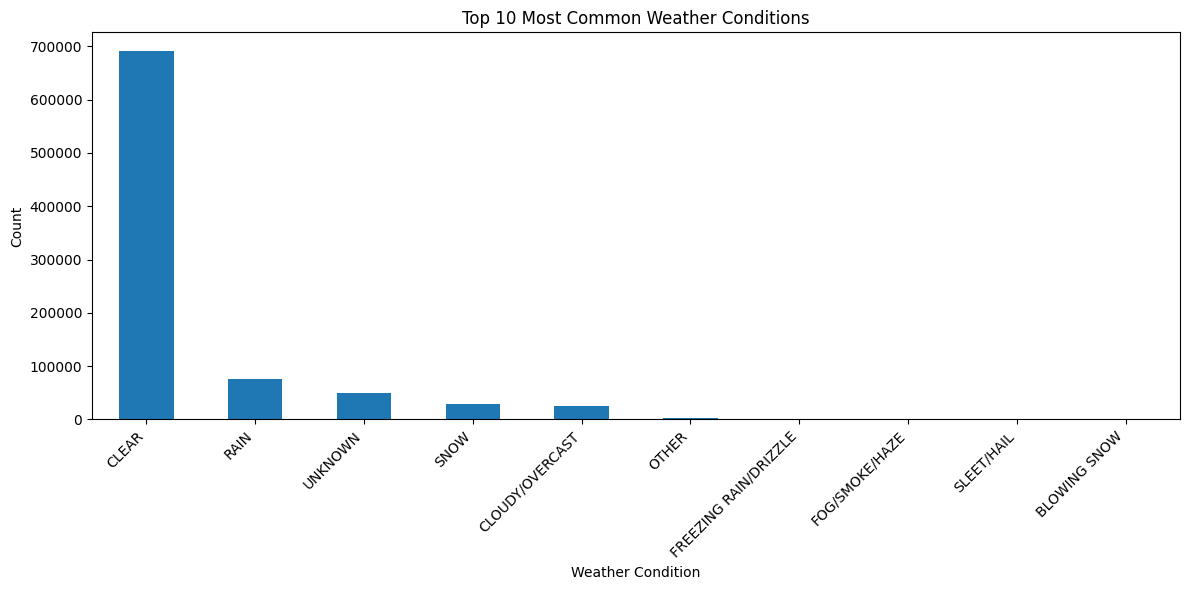

In [96]:
# Top 10 most common weather conditions
weather_counts = df['WEATHER_CONDITION'].value_counts().head(10)
plt.figure(figsize=(12, 6))
weather_counts.plot(kind='bar')
plt.title('Top 10 Most Common Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

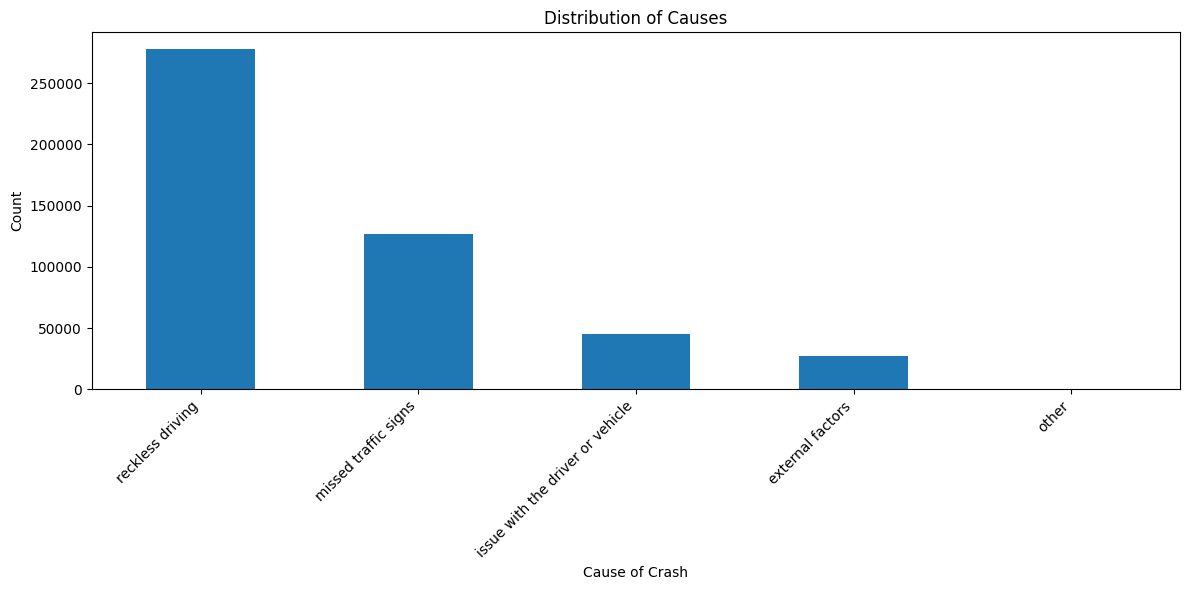

In [97]:
# Distribution of causes
cause_counts = df['CAUSE'].value_counts()
plt.figure(figsize=(12, 6))
cause_counts.plot(kind='bar')
plt.title('Distribution of Causes')
plt.xlabel('Cause of Crash')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

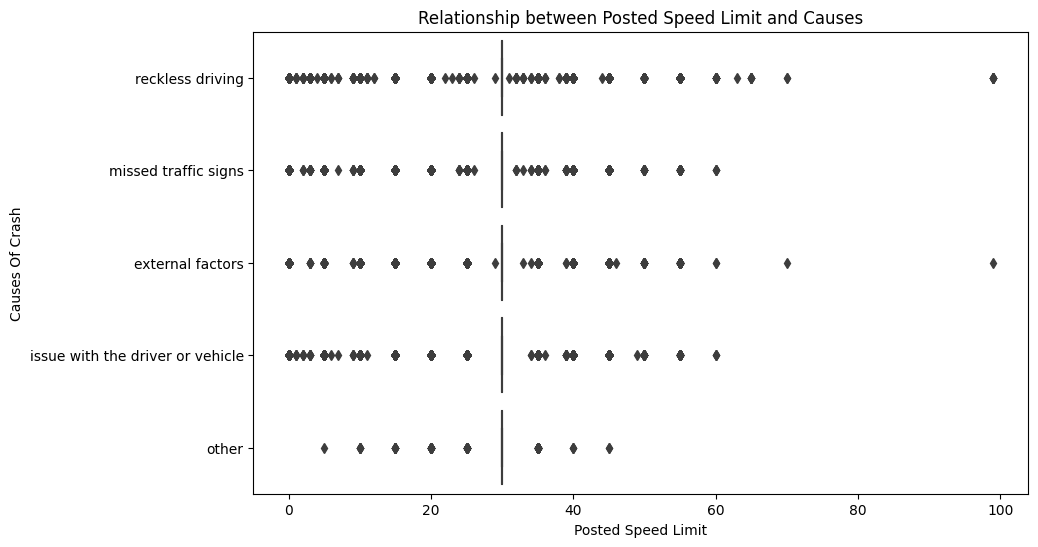

In [98]:
# Relationship between speed limit and causes
plt.figure(figsize=(10, 6))
sns.boxplot(x='POSTED_SPEED_LIMIT', y='CAUSE', data=cat_df)
plt.title('Relationship between Posted Speed Limit and Causes')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Causes Of Crash')
plt.show()

In [99]:
print(cat_df['POSTED_SPEED_LIMIT'].mean())

28.42366199748422


Most accidents surely fall in the reckless driving category. But driving fast does not necessarily lead to  crash.

In [100]:
#types of crashes that result in the most injuries
# Group by crash type and calculate the mean number of injuries
crash_type_injuries = cat_df.groupby('FIRST_CRASH_TYPE')['INJURIES_TOTAL'].mean().sort_values(ascending=False)

print(crash_type_injuries)

FIRST_CRASH_TYPE
PEDESTRIAN                      0.933698
PEDALCYCLIST                    0.718006
TRAIN                           0.613636
OVERTURNED                      0.592734
HEAD ON                         0.568894
ANGLE                           0.367707
TURNING                         0.249317
FIXED OBJECT                    0.226244
REAR END                        0.187398
OTHER NONCOLLISION              0.183792
SIDESWIPE OPPOSITE DIRECTION    0.164858
OTHER OBJECT                    0.162365
REAR TO SIDE                    0.100900
SIDESWIPE SAME DIRECTION        0.073203
ANIMAL                          0.069620
REAR TO FRONT                   0.063885
PARKED MOTOR VEHICLE            0.043300
REAR TO REAR                    0.022654
Name: INJURIES_TOTAL, dtype: float64


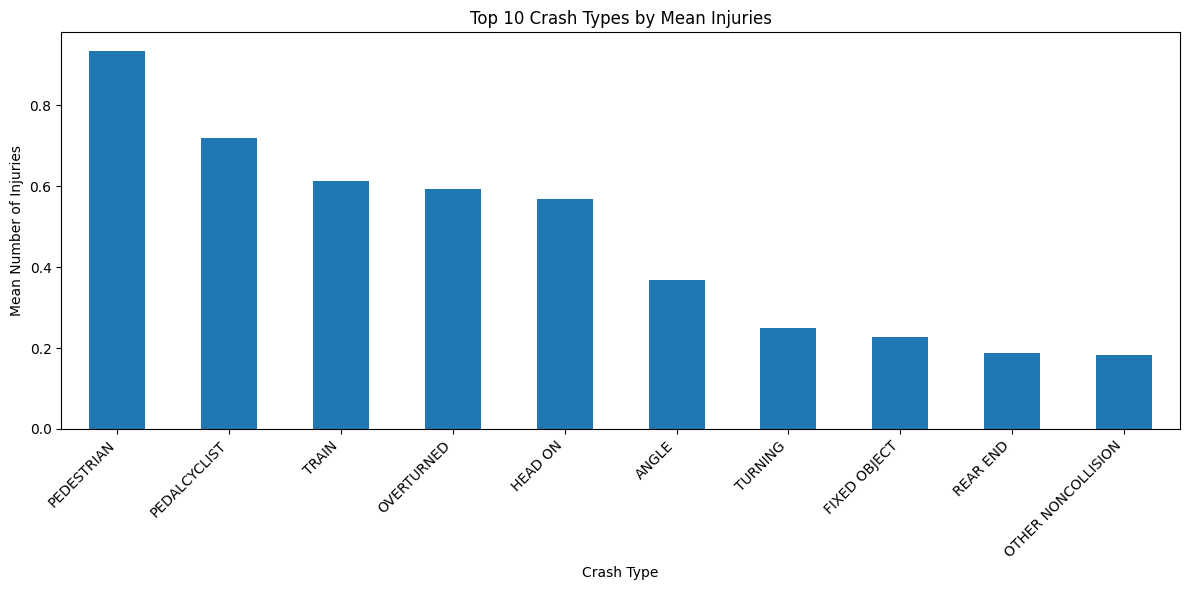

In [101]:
plt.figure(figsize=(12, 6))
crash_type_injuries.head(10).plot(kind='bar')
plt.title('Top 10 Crash Types by Mean Injuries')
plt.xlabel('Crash Type')
plt.ylabel('Mean Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [102]:
encoder = LabelEncoder()

cat_df['CAUSE'] = encoder.fit_transform(cat_df['CAUSE'])

In [103]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4455869 entries, 0 to 4566059
Data columns (total 50 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   POSTED_SPEED_LIMIT             float64
 1   TRAFFIC_CONTROL_DEVICE         object 
 2   DEVICE_CONDITION               object 
 3   WEATHER_CONDITION              object 
 4   LIGHTING_CONDITION             object 
 5   FIRST_CRASH_TYPE               object 
 6   TRAFFICWAY_TYPE                object 
 7   ALIGNMENT                      object 
 8   ROADWAY_SURFACE_COND           object 
 9   ROAD_DEFECT                    object 
 10  CRASH_TYPE                     object 
 11  DAMAGE                         object 
 12  PRIM_CONTRIBUTORY_CAUSE        object 
 13  SEC_CONTRIBUTORY_CAUSE         object 
 14  NUM_UNITS                      float64
 15  MOST_SEVERE_INJURY             object 
 16  INJURIES_TOTAL                 float64
 17  INJURIES_FATAL                 float64
 18  INJURIE

In [104]:
crash_type_cause = cat_df.groupby('FIRST_CRASH_TYPE')['CAUSE'].mean().sort_values(ascending=False)

print(crash_type_cause)

FIRST_CRASH_TYPE
PARKED MOTOR VEHICLE            4.304806
REAR TO REAR                    4.291262
REAR END                        4.111606
REAR TO FRONT                   4.111211
SIDESWIPE OPPOSITE DIRECTION    3.994369
SIDESWIPE SAME DIRECTION        3.971393
REAR TO SIDE                    3.851275
HEAD ON                         3.799653
OVERTURNED                      3.646272
OTHER OBJECT                    3.641483
PEDALCYCLIST                    3.605424
FIXED OBJECT                    3.563831
TURNING                         3.557796
PEDESTRIAN                      3.523261
ANGLE                           3.126252
OTHER NONCOLLISION              3.078713
TRAIN                           3.068182
ANIMAL                          1.757911
Name: CAUSE, dtype: float64


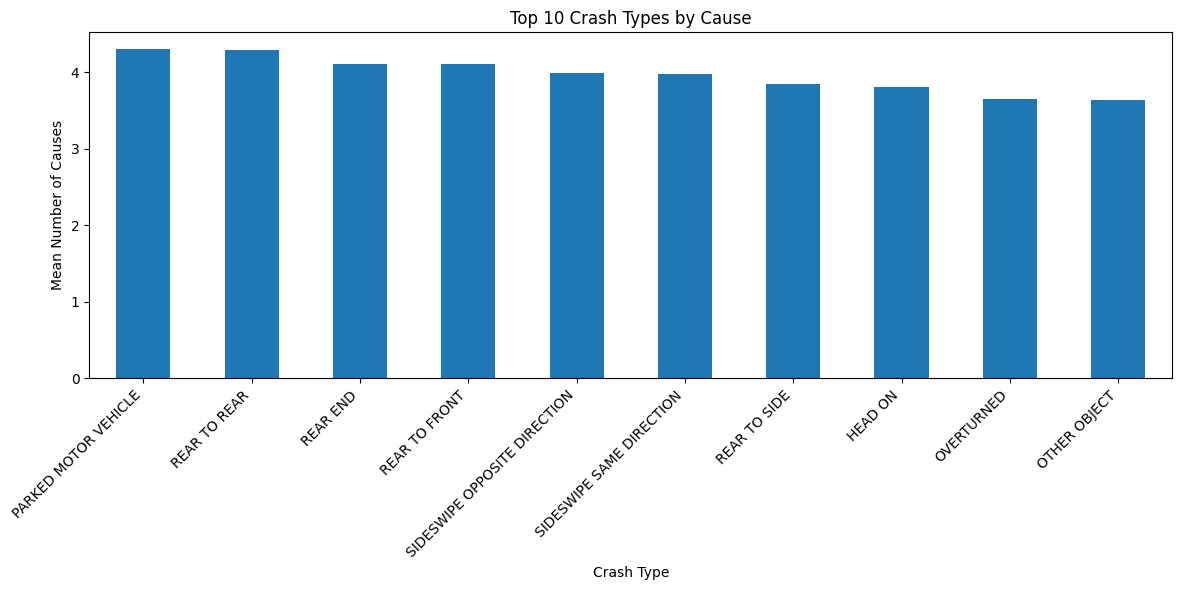

In [105]:
plt.figure(figsize=(12, 6))
crash_type_cause.head(10).plot(kind='bar')
plt.title('Top 10 Crash Types by Cause')
plt.xlabel('Crash Type')
plt.ylabel('Mean Number of Causes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

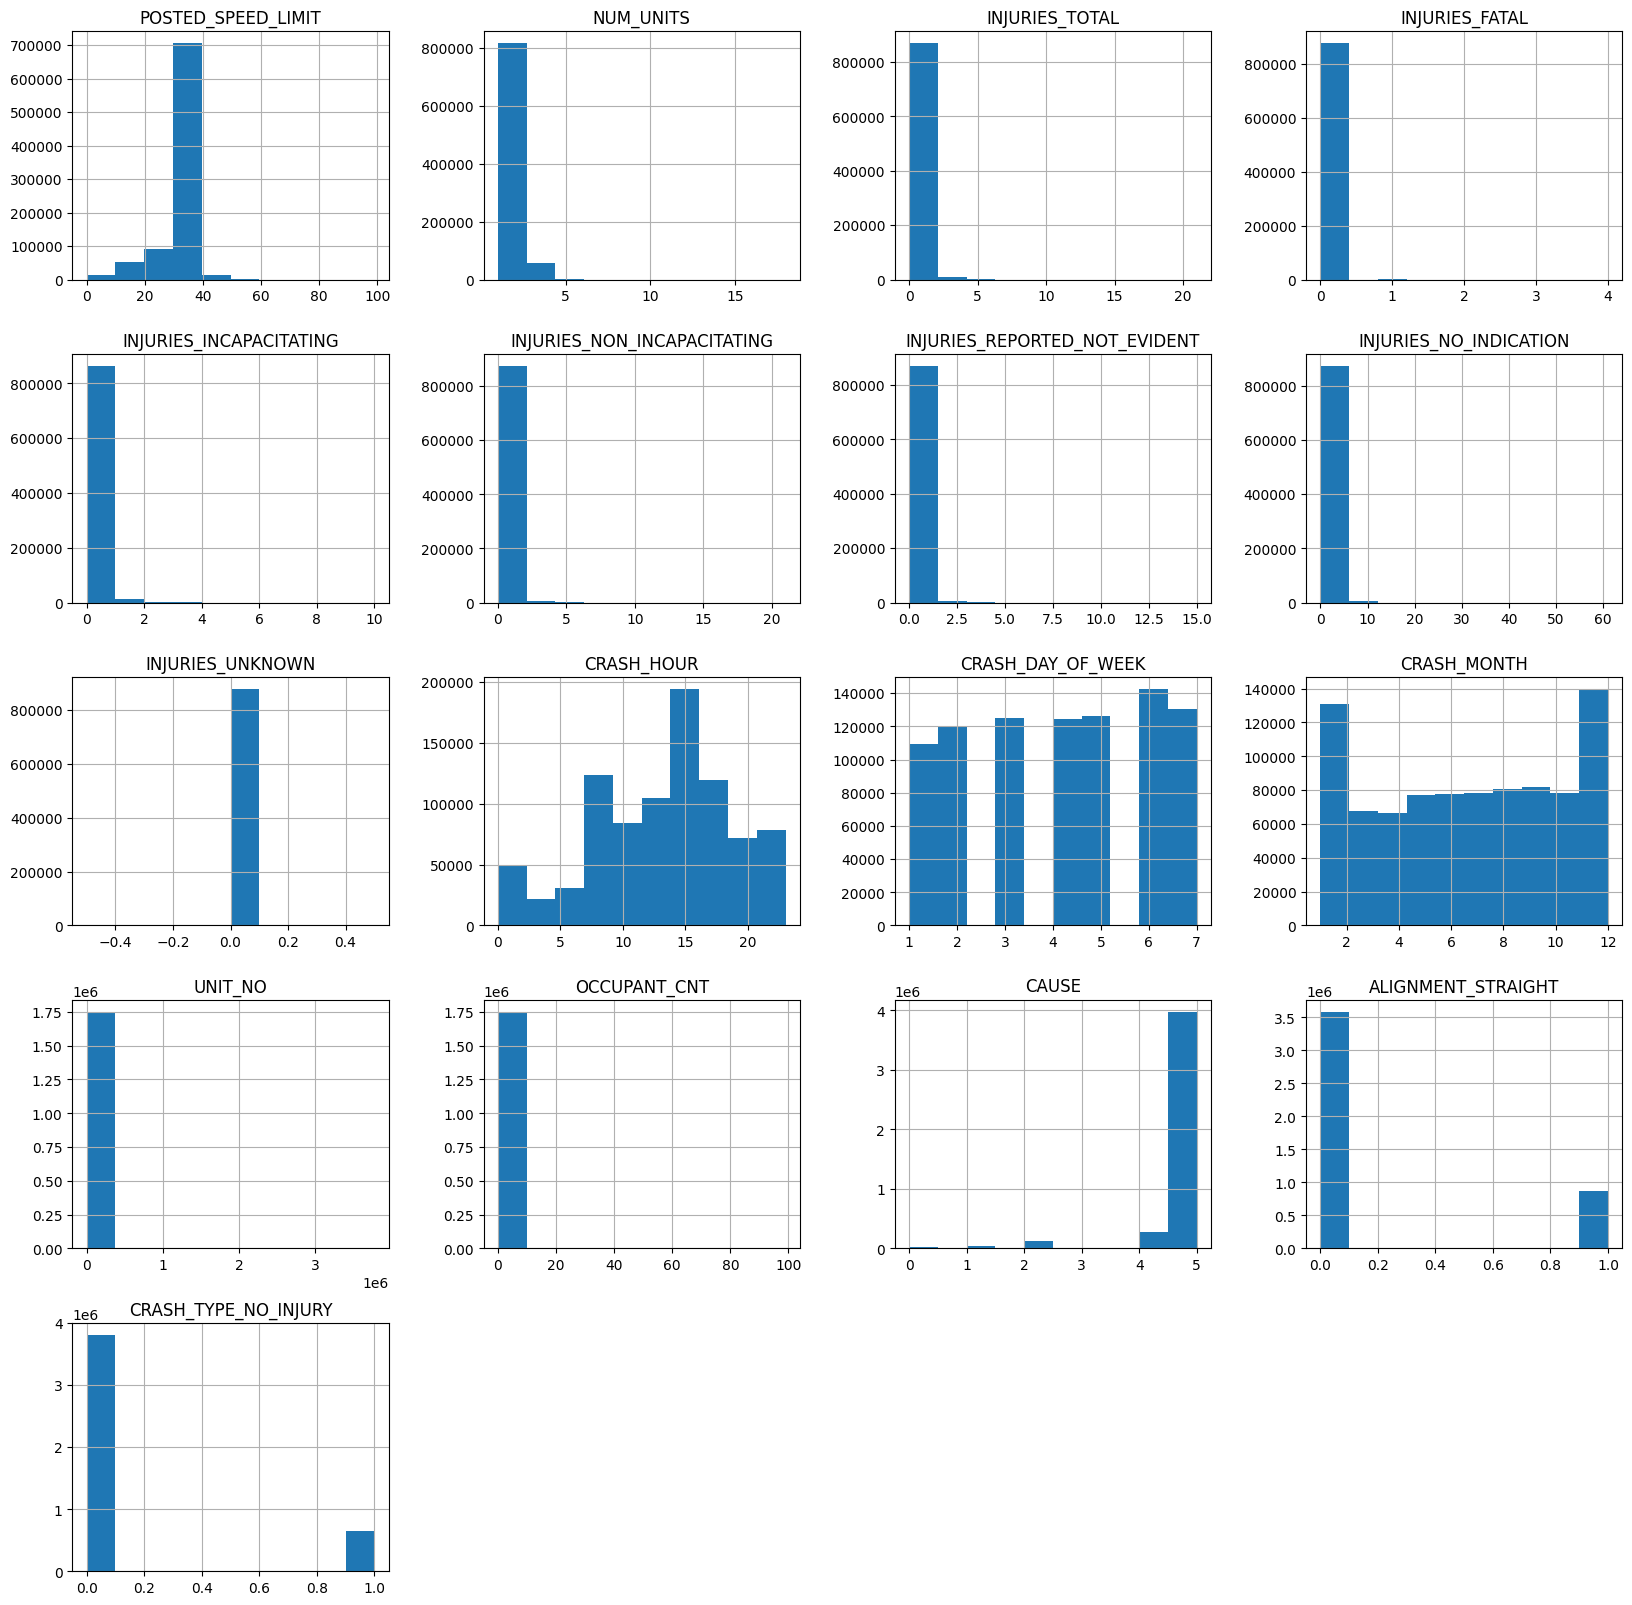

In [106]:
cat_df.hist(figsize=(20,20));

### Simple Logistic Regression


In [107]:
cat_df['CAUSE'].value_counts(normalize = True)

CAUSE
5    0.892689
4    0.062316
2    0.028483
1    0.010172
0    0.006188
3    0.000151
Name: proportion, dtype: float64

The dataset contains missing values (NaN) and the LogisticRegression algorithm doesn't support them natively. I can impute to replace missing values with a specific strategy i.e mean, mode or drop the samples that contain missing values. Since the data has over 4M observations, I have the luxury to do the latter.

We are encountering a MemoryError when trying to create dummy variables using pd.get_dummies because the resulting dummy matrix is too large to fit in memory. I will select a subset of columns to encode.

In [108]:
categorical_cols = [ 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                    'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND', 'ROAD_DEFECT','UNIT_TYPE','VEHICLE_DEFECT',
                    'MANEUVER','SEX', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT','DRIVER_ACTION', 'DRIVER_VISION',
                    'PHYSICAL_CONDITION', 'BAC_RESULT']

In [109]:
# Create dummy variables
new_df = pd.get_dummies(cat_df[categorical_cols])

In [110]:
numerical_cols = ['POSTED_SPEED_LIMIT','NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH','CAUSE',
                  'ALIGNMENT_STRAIGHT']

In [111]:
new_df1 = cat_df[numerical_cols]

In [112]:
merged_df = pd.concat([new_df, new_df1], axis=1)

In [113]:
X = merged_df.drop('CAUSE', axis=1)
y = merged_df['CAUSE']

In [114]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [115]:
print(X.shape)
print(y.shape)

(878455, 496)
(4455869,)


X has 878455 samples and 496 features, while y has 4455869 samples, which is a significant mismatch. I have to subset y to have the same number of samples as X.

In [116]:
y = y[:878455]

In [117]:
print(X.shape)
print(y.shape)

(878455, 496)
(878455,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [120]:
print(log_reg.coef_)

[[-5.39515660e-02  8.59620416e-01 -1.24802365e-01 ... -5.97002838e-03
   1.11173948e-02 -5.58326168e-01]
 [-5.47130771e-02  1.22017125e+00 -2.46893638e-01 ... -2.42361107e-04
  -5.69108558e-03 -4.01084826e-01]
 [ 2.58495522e-01 -4.31337382e-01 -1.94839757e-01 ...  7.22252902e-04
   2.24282398e-03  6.40349079e-01]
 [-4.35793350e-02 -3.72161933e-01  2.21973215e-01 ...  2.50329165e-03
  -1.60780920e-03 -2.10489503e-01]
 [-4.80813714e-01 -7.41484719e-01 -3.70376690e-02 ...  9.82802584e-03
   1.20644497e-03 -1.36675661e-01]
 [-5.96431233e-03  1.75453902e-02  2.23109892e-01 ... -8.19393780e-03
  -2.43799511e-03  2.70014600e-01]]


In [121]:
print(log_reg.intercept_)

[ 0.47224304 -1.29411064 -1.90894889 -3.48284022 -1.40449026 -0.1091156 ]


Each coefficient represents the change in the log-odds of the outcome for a one-unit increase in the predictor variable, holding all other variables constant.

The intercept or bias term represents the log-odds of the positive class when all features are equal to zero.

In [122]:
y_pred = log_reg.predict(X_test)

In [123]:
print(log_reg.score(X_test, y_test))

0.48964944134873156


Accuracy of logistic regression classifier on test set is 49%